### Libraries

In [1]:
import pandas as pd
from main import *
from helper import *
from solution import *

### Import Data

In [2]:
# Data locations
datapath = "../../../data/"
train_loc = datapath + "train.txt"
test_loc = datapath + "test.txt"

# Import data
train_df = load_data(train_loc)
train_df

array([[ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [3]:
print("Dataset shape: ", train_df.shape)

Dataset shape:  (1561, 257)


## Data Exploration

In [4]:
train_df[:,0]

array([5., 1., 1., ..., 1., 1., 1.])

In [5]:
train_df[:,0].shape

(1561,)

In [6]:
train_df[0:3,:][1][0]

1.0

### Get data in the right shape for show_images function

In [7]:
data_visu = train_df[0:2, 1:]
i = 0

new_array = []
while i < data_visu.shape[0]:
    
    image = data_visu[i].reshape(16, 16)
    new_array.append(image)
    
    print("", i)
    i = i + 1
    
      
data_for_visu = np.array(new_array)
data_for_visu.shape

 0
 1


(2, 16, 16)

### Visualize data with show_images

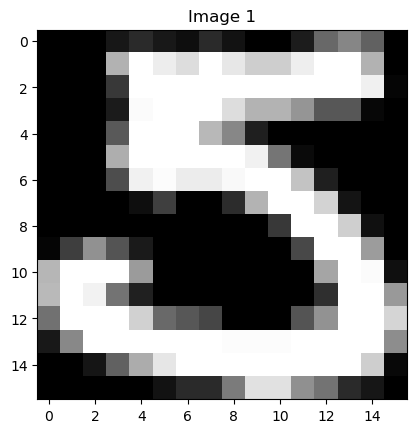

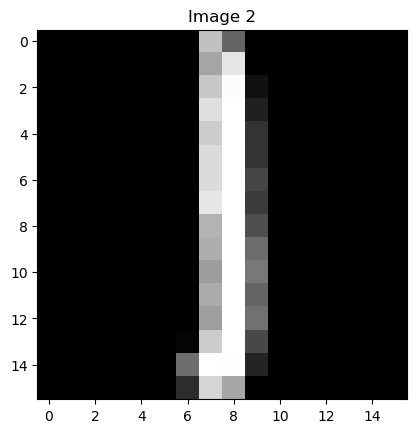

In [8]:
show_images(data_for_visu, save=True)

### Use extract_feature function to extract symmetry and intensity features from each image

In [9]:
observations_range = train_df[:].shape[0]

label = []
sys = []
intense = []

for i in range(observations_range):

    input_extract_features = train_df[:, 1:][i]
    sys_intense = extract_feature(input_extract_features)

    sys_temp = sys_intense[0]
    intense_temp = sys_intense[1]
    label_temp = train_df[:,0][i]

    label.append(label_temp)
    sys.append(sys_temp)
    intense.append(intense_temp)
    
train_set = pd.DataFrame({"Sys": sys, "Intense": intense, "Label": label})
train_set.head()

,Sys,Intense,Label
0,-0.533727,-0.111738,5.0
1,-0.117438,-0.753914,1.0
2,-0.162297,-0.772281,1.0
3,-0.059500,-0.769258,1.0
4,-0.050906,-0.795438,1.0


In [10]:
# Convert lists to numpy arrays and stack them as columns
X = np.column_stack((sys, intense))

print(X.shape)
X

(1561, 2)


array([[-0.53372656, -0.11173828],
       [-0.1174375 , -0.75391406],
       [-0.16229688, -0.77228125],
       ...,
       [-0.21638281, -0.60979297],
       [-0.09282031, -0.66230859],
       [-0.13085156, -0.44755859]])

In [11]:
y = label
len(y)

1561

### Plot 2-D Scatter Plot using show_features function

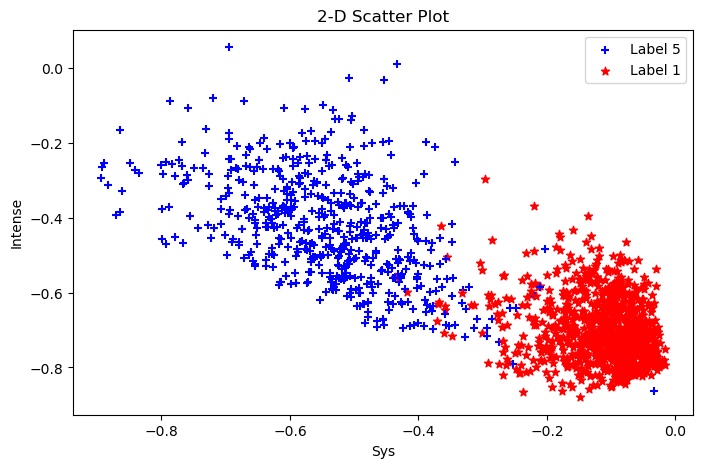

In [12]:
show_features(X, label, save=False)